# Домашнее задание 1 - Классификация
<br>

Задание выполнил(а): Зосимов Савва
<br>
**Дедлайн:** 23.04.2021 23:59


### О задании
В этом домашнем задании вы научитесь работать с CAS при помощи библиотеки swat, познакомитесь c библиотекой dlpy, позволяющей использовать функциональность SAS для глубинного обучения из Python, а так же постороите с помощью этих библиотек модель для классификации изображений одежды.
<br>
Для выполнения заданий нужно самостоятельно написать или дополнить написанный код, а так же письменно ответить на вопросы (в зависимости от задания).

**Домашнее задание построено следующим образом:**
- Подключение к серверу CAS
- Задание 1: Загрузка данных в CAS (1 балл)
- Задание 2: Посмотрим на данные (1 балл)
- Задание 3: Выделение валидационной выборки из train (1 балл)
- Задание 4: Построение нейронной сети (3 балла)
- Задание 5: Обучение сети (2 балла)
- Задание 6: Оценка качества полученной модели (2 балла)
- Дополнительное задание: Aугментации исходных данных (+2 балла)<br>

Итого, полностью выполнив задание вы получите 10 баллов. Вы также можете выполнить дополнительное задание, чтобы получить еще 2 бонусных балла.

### Формат сдачи

После того, как вы выполните домашную работу, поместите jupyter notebook с выполнеными заданиями, а так же все SAS-таблицы с сохраненными моделями в закрытый git-репозиторий на GitHub. Предоставьте доступ к репозиторию аккаунтам GazizovMarat и Ala1s (добавив в свой реппозиторий в качестве коллабораторов).

### Важно 
Для того, чтобы ваши результаты были воспроизводимыми для проверки, указывайте seed при вызове методов, где это возможно. Напоминания об этом так же содержатся в тексте заданий.

In [98]:
!pip3 install sas-dlpy --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
!pip3 install opencv-python --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


     |████████████████                | 25.2 MB 2.5 MB/s eta 0:00:10    |                                | 153 kB 1.5 MB/s eta 0:00:35     |▎                               | 358 kB 1.5 MB/s eta 0:00:35     |▎                               | 460 kB 1.5 MB/s eta 0:00:35     |▍                               | 563 kB 1.5 MB/s eta 0:00:35     |▍                               | 655 kB 1.5 MB/s eta 0:00:34     |▌                               | 757 kB 1.5 MB/s eta 0:00:34     |▋                               | 911 kB 1.5 MB/s eta 0:00:34     |▋                               | 1.0 MB 1.5 MB/s eta 0:00:34     |▊                               | 1.2 MB 1.5 MB/s eta 0:00:34     |▉                               | 1.3 MB 1.5 MB/s eta 0:00:34     |█                               | 1.4 MB 1.5 MB/s eta 0:00:34     |█                               | 1.5 MB 1.5 MB/s eta 0:00:34     |█                               | 1.6 MB 1.2 MB/s eta 0:00:41     |█                               | 1.7 MB 1.2 MB/s eta 0:

     |████████████████████████████████| 50.4 MB 16 kB/s  eta 0:00:01     |███████████████████████████████ | 48.8 MB 1.7 MB/s eta 0:00:01     |███████████████████████████████▏| 49.2 MB 1.7 MB/s eta 0:00:01     |███████████████████████████████▌| 49.7 MB 1.7 MB/s eta 0:00:01     |███████████████████████████████▉| 50.2 MB 1.7 MB/s eta 0:00:01     |████████████████████████████████| 50.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 195 kB/s eta 0:00:01    |▊                               | 337 kB 4.8 MB/s eta 0:00:04     |██▍                             | 1.1 MB 4.8 MB/s eta 0:00:03     |██▉                             | 1.3 MB 4.8 MB/s eta 0:00:03     |███▌                            | 1.6 MB 4.8 MB/s eta 0:00:03     |████                            | 1.8 MB 4.8 MB/s eta 0:00:03     |████▏                           | 1.9 MB 1.3 MB/s eta 0:00:10     |████▍                           | 2.1 MB 1.3 MB/s eta 0:00:10     |████▋                           | 2.2 MB 1.3 MB/s

In [99]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from swat import *
from dlpy import Model, Sequential
from dlpy.layers import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split

## Подключение к серверу CAS

Подключитесь к серверу CAS под своим логином и паролем.<br>Загрузите следующие Action Sets: 'image','deepLearn'.<br>
<br>
Для выполнения задания обратитесь к документации по следующим ссылкам: <br>
- https://sassoftware.github.io/python-swat/getting-started.html <br>

In [100]:
#os.environ['CAS_CLIENT_SSL_CA_LIST'] = r"/tmp/4fix/trustedcerts.pem"

# Создаем новую сессию CAS:

s = CAS('tiger.cs.msu.ru', 5570, username='msu95', password='DarWin##D4')

# Загружаем action sets:

s.loadactionset('image')
s.loadactionset('deepLearn')
s.loadactionset('datastep')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'datastep'.


[actionset]

 'datastep'

+ Elapsed: 0.000497s, user: 0.000181s, sys: 0.000257s, mem: 0.221mb

#### Загрузка данных
Для работы с изображениями в SAS DLPy используются специализированные таблицы - ImageTable. Для загрузки набора данных, помимо сессии CAS и названия для новой таблицы, требуется указать путь к папке с набором данных сервере. 
При загрузке нужно указать путь к папке, устроенной следующим образом: <br>
* shirt
    - shirt_image0.png
    - shirt_image1.png
    - ...
* pants
    - pants_image0.png
    - pants_image1.png
    - ...
* ... 
<br>
То есть, папка должна состоять из подпапок, называющихся соответственно классам обьектов на изображении. В каждой из таких подпапок должны лежать все изобращения с обьектами соответствующего класса.<br>
Папки train-images (обучающая выборка) и t10k-images (тестовая выборка) внутри папки data в этом репозитории устроены описанным выше образом. 
Также, данные fashion-MNIST можно скачать из следующего репозитория:<br> 
- https://github.com/zalandoresearch/fashion-mnist <br>

**Задание 1: Загрузка данных в CAS**<br>
Загрузите обучающие и тестовые данные в CAS, создав ImageTable (для каждой выборки отдельно).

In [101]:
# создайте ImageTable для обучающей выборки #
trainImgTbl = ImageTable.load_files(s, path = '/var/home/msu95/SAS-CV-2020-Homework1/data/train-images')
print(trainImgTbl.numrows()["numrows"])

60000


In [102]:
# создайте ImageTable для тестовой выборки #
testImgTbl = ImageTable.load_files(s, path = '/var/home/msu95/SAS-CV-2020-Homework1/data/t10k-images')
print(testImgTbl.numrows()["numrows"])

10000


**Задание 2: Исследование данных**<br>
а) С помощью метода show выведите 16 случайных изображений из ImageTable в таблице размером 4x4 ячейки (для train и test отдельно).

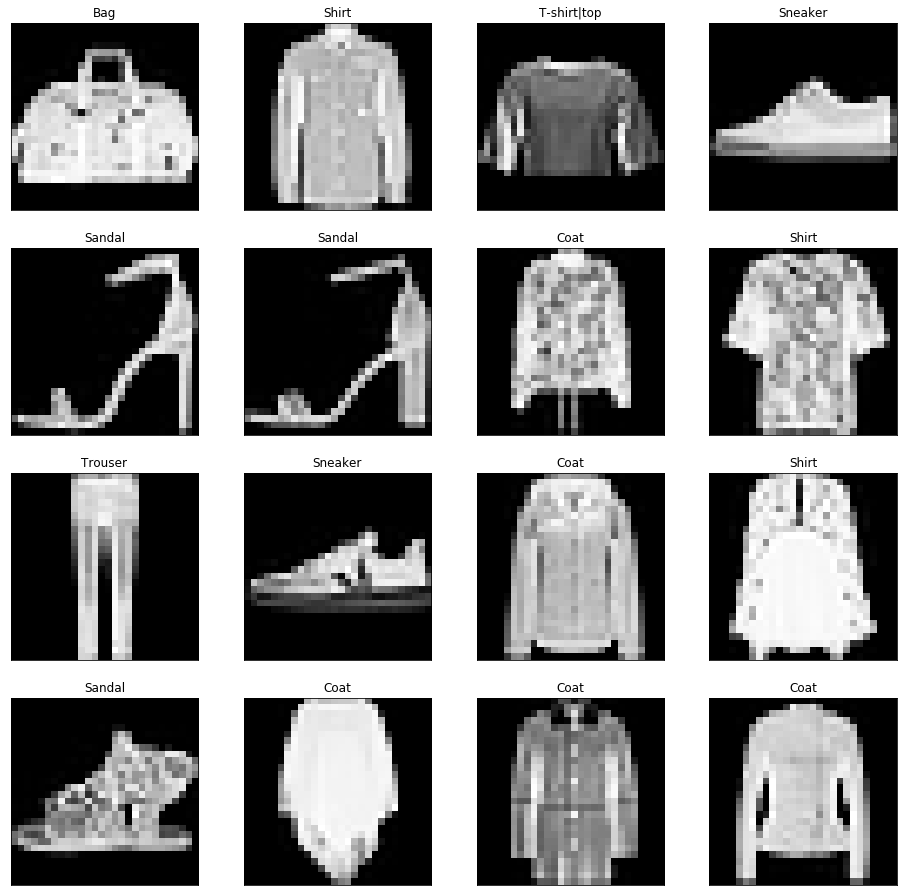

In [105]:
# выведите 16 изображений из обучающей выборки #
trainImgTbl.show(16,4, randomize = True)

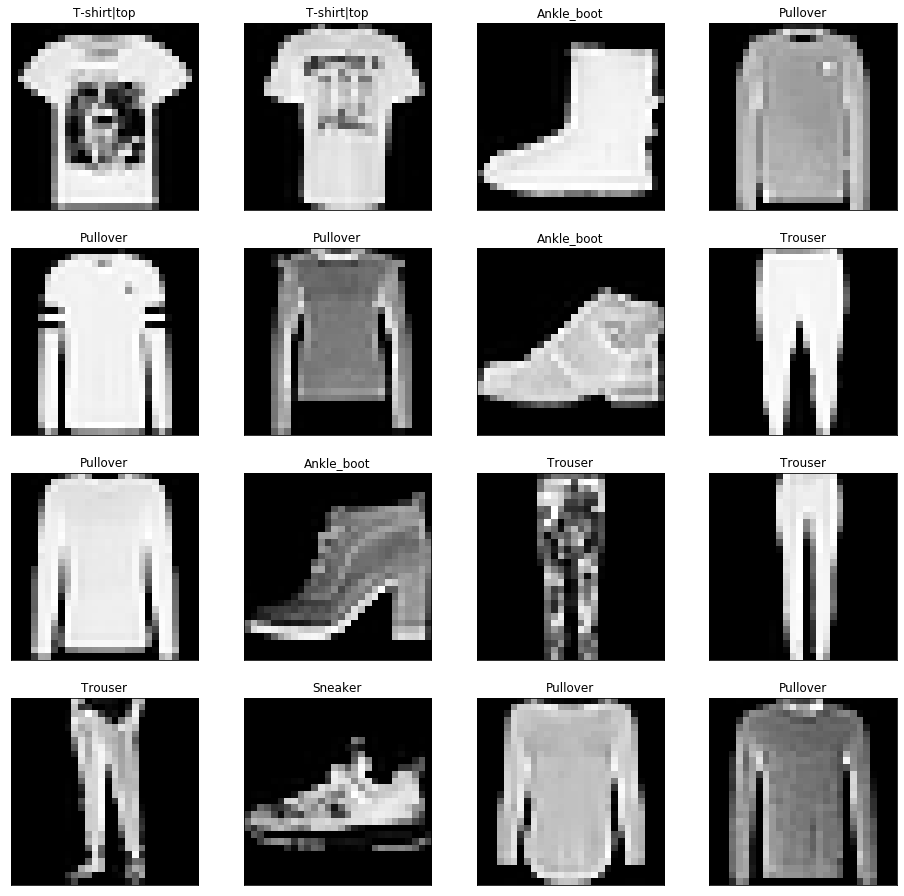

In [104]:
# выведите 16 изображений из тестовой выборки #
testImgTbl.show(16,4, randomize = True)

b) Найдите метод класса ImageTable, позволяющий подсчитать статистику по метаданным таблицы (например, средние размеры или значения пикселей). Примените этот метод к таблицам, в которые вы загрузили наборы данных train и test.

In [106]:
# статистики по метаданным для train #
trainImgTbl.image_summary

jpg                 60000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    72.9404
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

In [50]:
# статистики по метаданным для test #
testImgTbl.image_summary

jpg                 10000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    73.1466
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

**Задание 3: Выделение валидационной выборки из train**<br>
- Перед тем, как выделить из train выборку для валидации модели, посмотрите на распределение классов (с помощью свойства ImageTable).
- Выделите из таблицы train выборку в размере 15 процентов от исходного с помощью two_way_split. Убедитесь, что вы задали seed, для того, чтобы мы могли воспроизвести и проверить ваши результаты), а возвращаемые таблицы - типа ImageTable, как и исходная.
- После выделения validate выборки, снова посмотрите на распреление классов на train и validate выборках, чтобы убедиться, что в обеих выборках присутстует равное количество примеров для каждого из классов.

In [107]:
frequency = trainImgTbl.label_freq
print("The minimum number of images among each class: ", np.min(frequency["Frequency"]))
print("The maximum number of images among each class: ", np.max(frequency["Frequency"]))
print(frequency)

The minimum number of images among each class:  6000
The maximum number of images among each class:  6000
Frequency for IMAGEDATA_DPILUH

             Level  Frequency
Ankle_boot       1       6000
Bag              2       6000
Coat             3       6000
Dress            4       6000
Pullover         5       6000
Sandal           6       6000
Shirt            7       6000
Sneaker          8       6000
T-shirt|top      9       6000
Trouser         10       6000


In [108]:
# код для деления на 2 выборки
train_data, val_data = two_way_split(trainImgTbl, test_rate=15, stratify=True, im_table=True,seed=42)

In [110]:
val_freq = val_data.label_freq
train_freq = train_data.label_freq
print("Number of images in train_set:", train_data.numrows()["numrows"])
print("Number of images in validation_set:", val_data.numrows()["numrows"])
print(val_freq , train_freq)

Number of images in train_set: 51000
Number of images in validation_set: 9000
Frequency for TEST_AHZFL6

             Level  Frequency
Ankle_boot       1        900
Bag              2        900
Coat             3        900
Dress            4        900
Pullover         5        900
Sandal           6        900
Shirt            7        900
Sneaker          8        900
T-shirt|top      9        900
Trouser         10        900 Frequency for TRAIN_8DMWHY

             Level  Frequency
Ankle_boot       1       5100
Bag              2       5100
Coat             3       5100
Dress            4       5100
Pullover         5       5100
Sandal           6       5100
Shirt            7       5100
Sneaker          8       5100
T-shirt|top      9       5100
Trouser         10       5100


**Задание 4: Построение модели**<br>
Постройте модель, соответствующую изображенной на картинке, c помощью dlpy в Sequential-подходе.
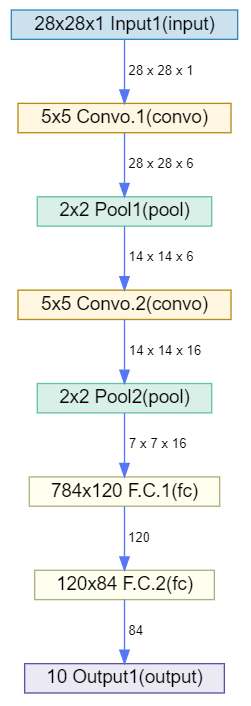

In [111]:
# код для построения модели #
model = Sequential(s, model_table = 'CNN')
model.add(InputLayer(1,28,28))
model.add(Conv2d(6,5))
model.add(Pooling(2))
model.add(Conv2d(16,5))
model.add(Pooling(2))
model.add(Dense(120))
model.add(Dense(84))
model.add(OutputLayer(n=10))



NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


**Задание 5: Oбучение модели**<br>
а) Обучите построенную модель. Гиперпараметры для обучения уже заданы, менять их не требуется. Не забудьте задать seed, чтобы  ваши результаты были воспроизводимыми. Полученная вами модель должна показать Miscalssification Rate < 15% на тестовой выборке.

In [112]:
from dlpy.model import *
from dlpy.model import Optimizer
from dlpy.lr_scheduler import *

In [113]:
# Variable for Number of Epochs
nEpoch=50

# Variable for Number of Threads
nThread=4

# Variable for Batch Size
batchSize=128

# Calculate miniBatch Size
miniBatch=math.ceil(batchSize/nThread)

# Define Learning Rate scheduler parameters
lr_scheduler=ReduceLROnPlateau(conn=s, 
                               cool_down_iters=3, 
                               gamma=0.8, 
                               learning_rate=0.001, 
                               patience=5
                               )

# Define Momentum Solver parameters
solver=MomentumSolver(lr_scheduler=lr_scheduler,
                      clip_grad_max = 100, 
                      clip_grad_min = -100
                      )                       

# Define Solver optimizer parameter settings
optimizer=Optimizer(seed=12345, 
                    algorithm=solver, 
                    mini_batch_size = miniBatch, 
                    log_level=2, 
                    max_epochs=nEpoch, 
                    reg_l2=0.0005
                    )


The following argument(s) learning_rate, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [116]:
# код для обучения модели
train_history = model.fit(data = train_data, valid_table = val_data, n_threads=nThread, record_seed=13309, seed = 42, optimizer=optimizer,
                          inputs = ['_image_'],train_from_scratch =True)

NOTE: Ignoring the existing weights and training from scratch.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 107786.
NOTE:  The approximate memory cost is 16.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       0.07 (s).
NOTE:  The total number of threads on each worker is 4.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 128.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: Ankle_boot 
NOTE:  Level      1: Bag        
NOTE:  Level      2: Coat       
NOTE:  Level      3: Dress      
NOTE:  Level      4: Pullover   
NOTE:  Level      5: Sandal     
NOTE:  Level      6: Shirt      
NOTE:  Level      7: Sneaker    
NOTE:  Level      8: T-shirt|top
NOTE:  Level      9: Trouser    
NOTE:  Number of input variables:     1
NO

b) Пользуясь значениями в history, постройте график, анологичный изображенному.
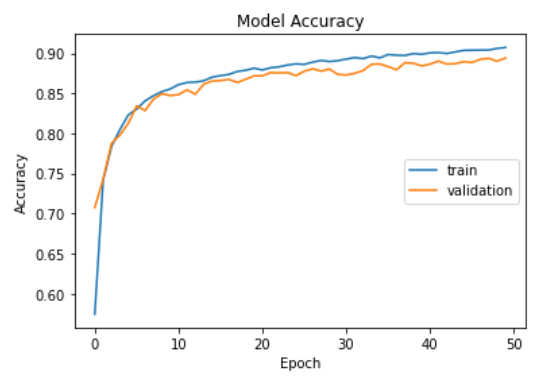

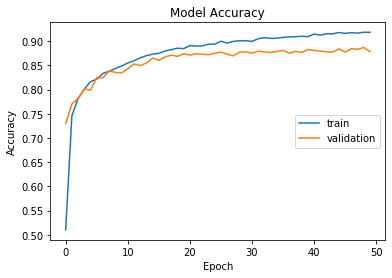

In [117]:
history = train_history["OptIterHistory"]
plt.plot(1.-history["FitError"])
plt.plot(1.-history["ValidError"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

#код для построения графика#

**Задание 6: Oценка качества модели**<br>

а) Выведите матрицу ошибок на валидационной выборке для модели и ответьте на следующие вопросы:
- Сколько изображений сумок было корректно классифицированно моделью?
- Сколько пулловеров было классифицированно моделью как рубашки? Наоборот?
- В классификации какого предмета одежды модель ошибалась чаще всего? А реже всего?

In [128]:
# код для вывода матрицы ошибок#
from dlpy.metrics import confusion_matrix
res = model.evaluate(val_data, model_task = "CLASSIFICATION")
conf_mat = confusion_matrix('_label_', 'I__label_',res["OutputCasTables"]["casTable"][0])
conf_mat

,Ankle_boot,Bag,Coat,Dress,Pullover,Sandal,Shirt,Sneaker,T-shirt|top,Trouser
_label_,,,,,,,,,,
Ankle_boot,869.0,1.0,0.0,1.0,0.0,6.0,0.0,23.0,0.0,0.0
Bag,1.0,876.0,1.0,6.0,7.0,0.0,5.0,2.0,1.0,1.0
Coat,0.0,1.0,668.0,22.0,151.0,0.0,55.0,0.0,2.0,1.0
Dress,0.0,2.0,34.0,823.0,8.0,1.0,10.0,0.0,10.0,12.0
Pullover,1.0,1.0,74.0,9.0,767.0,0.0,40.0,0.0,4.0,4.0
Sandal,10.0,4.0,0.0,1.0,0.0,875.0,0.0,10.0,0.0,0.0
Shirt,0.0,12.0,63.0,19.0,108.0,0.0,587.0,0.0,109.0,2.0
Sneaker,35.0,0.0,0.0,0.0,0.0,33.0,0.0,832.0,0.0,0.0
T-shirt|top,0.0,4.0,5.0,35.0,28.0,1.0,85.0,0.0,739.0,3.0


Ваши ответы на вопросы:
1)876
2)40
3)Больше всего ошибок в классификации рубашке (197), реже всего - Сумки (25)

b) Проскорьте модель на тестовой выборке.

In [129]:
# код для скоринга #
s.dlScore(table=testImgTbl,
          modelTable=model.model_name,
          initWeights=model.model_weights.name,
          topprobs=5
         )

,Descr,Value
0,Number of Observations Read,10000
1,Number of Observations Used,10000
2,Misclassification Error (%),12.92
3,Top 5 Misclassification Error (%),0.29
4,Loss Error,0.38481


c) Выведите пример изображения, классифицированного верно, с помощью встроенной функции класса Model.

NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu95).


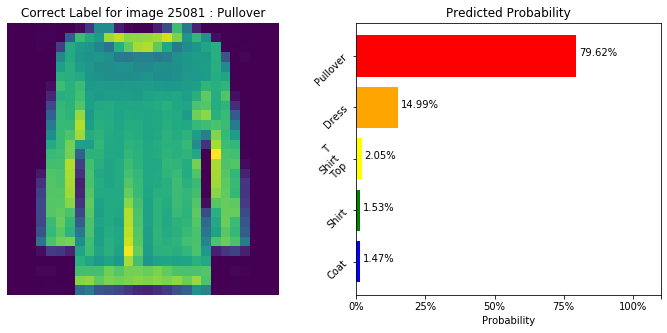

In [132]:
# код для вывода верно классифицированного изображения#
model.evaluate(data = train_data)
model.plot_evaluate_res(img_type = 'C', randomize = True, n_images = 1)

d) Выведите пример изображения, классифицированного ошибочно, с помощью встроенной функции класса Model.

NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu95).


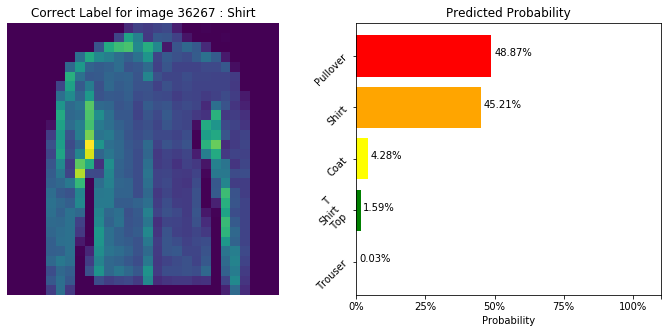

In [134]:
# код для вывода неверно классифицированного изображения#
model.evaluate(data = train_data)
model.plot_evaluate_res(img_type = 'M', randomize = True, n_images = 1)

e) Сохраните полученную модель в SAS-таблицу, с помощью одного из методов класса Model.

In [136]:
# код для сохранения модели #
model.save_to_table(path = '/var/home/msu95/SAS-CV-2020-Homework1' )

NOTE: Model table saved successfully.


**Дополнительное задание: Aугментации исходных данных**<br>
Изучите документацию к CAS-action augmentImages. Попробуйте улучшить результат предыдущей модели, применив аугментации к исходным данным и, по желанию, другие техники для улучшения качества модели. Полученную модель проскорьте на тестовой выборке и сохраните в SAS-таблицу. Выведите метрики качества новой модели на тестовой выборке.

In [ ]:
s.augmentImages(table=train_data,